## Multiple linear Regression - economic dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

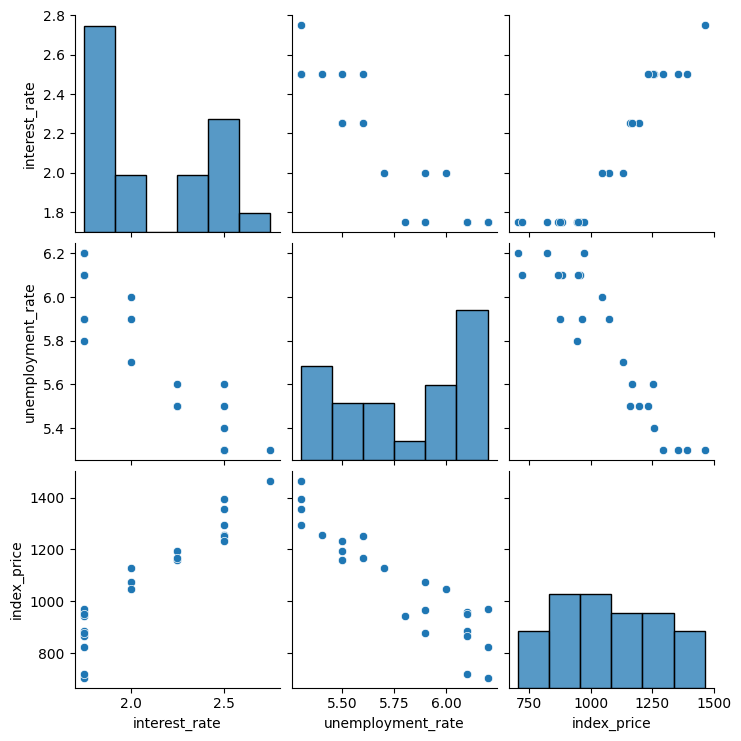

In [8]:
## visualization
import seaborn as sns 
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


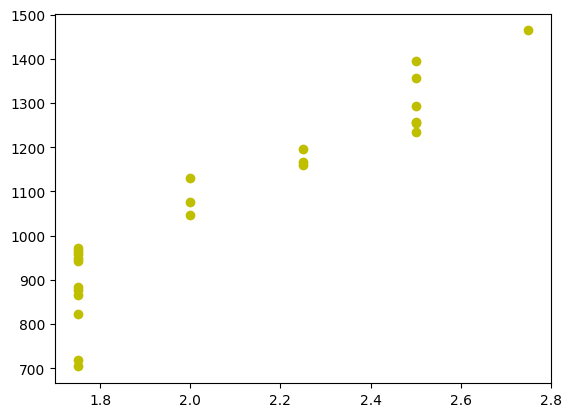

In [10]:
## visualize the datapoints more closely 
plt.scatter(df["interest_rate"],df['index_price'],color='y')

In [11]:
## independent and dependent features 
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [13]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [14]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

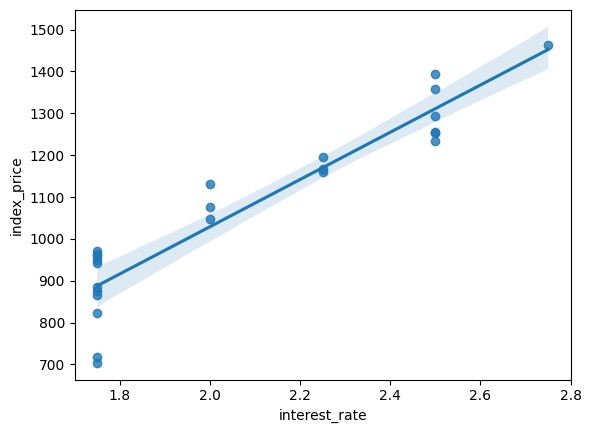

In [16]:
#regression plot 
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

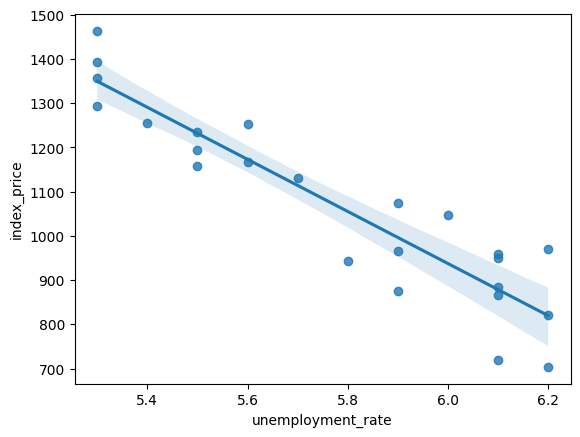

In [17]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

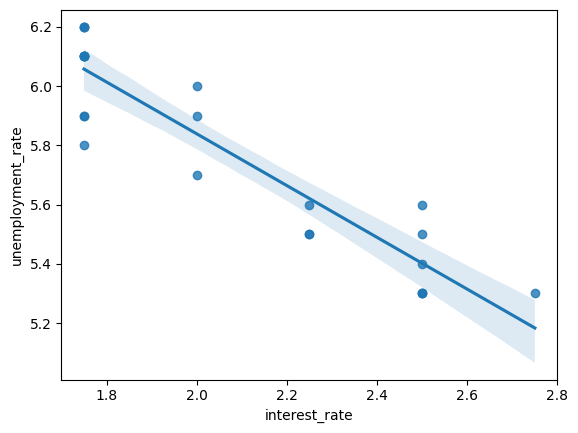

In [18]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [19]:
## standardScalar
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [23]:
regression.fit(X_train,Y_train)

LinearRegression()

In [24]:
y_pred=regression.predict(X_test)

In [25]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [27]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [28]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [29]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [30]:
from sklearn.metrics import r2_score

In [31]:
score=r2_score(Y_test,y_pred)
print(score)
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


### Assumptions

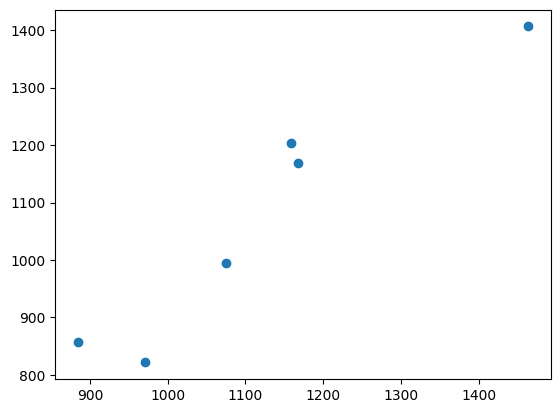

In [32]:
plt.scatter(Y_test,y_pred)

In [33]:
residuals=Y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


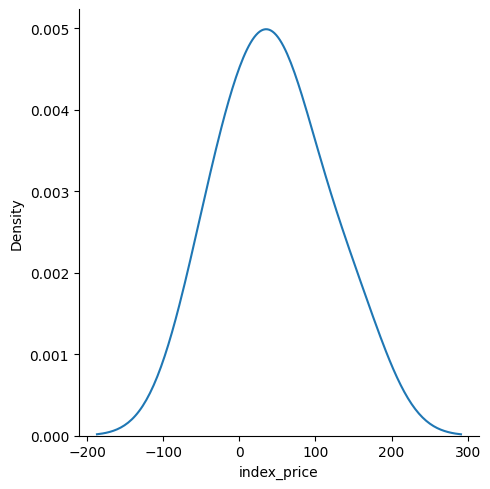

In [34]:
## plot the residuals
sns.displot(residuals,kind='kde')

In [36]:
## ols linear regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [37]:
model.summary()

c:\Users\Sandeep\Data_science_and_ML\my_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                       0.754
Time:                        19:26:48   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(regression.coef_)

[  88.27275507 -116.25716066]
